<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs</a></span><ul class="toc-item"><li><span><a href="#Fichiers-des-stations-:" data-toc-modified-id="Fichiers-des-stations-:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fichiers des stations :</a></span><ul class="toc-item"><li><span><a href="#Fonction-de-lecture" data-toc-modified-id="Fonction-de-lecture-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Fonction de lecture</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Industrialisation</a></span></li></ul></li><li><span><a href="#Fichier-activité-Vcub" data-toc-modified-id="Fichier-activité-Vcub-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fichier activité Vcub</a></span><ul class="toc-item"><li><span><a href="#Fonction-de-lecture-:" data-toc-modified-id="Fonction-de-lecture-:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Fonction de lecture :</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Industrialisation</a></span></li></ul></li></ul></li></ul></div>

In [66]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Objectifs

- Lecture des données des vcub de Bordeaux.
- Création de functions de lecture.

### Fichiers des stations : 

In [67]:
file_path = "../../data/bordeaux-stations.csv"
stations = pd.read_csv(file_path)

In [68]:
stations.shape

(174, 4)

In [69]:
stations.head()

,ident,nom,lat,lon
0,138,Lycée Brémontier,44.824055,-0.570243
1,135,Eglise Ste Croix,44.831312,-0.561393
2,79,Buttinière,44.864276,-0.524200
3,3,Porte de Bourgogne,44.837789,-0.567156
4,8,Doyen Brus,44.800385,-0.609857


<AxesSubplot:xlabel='lat', ylabel='lon'>

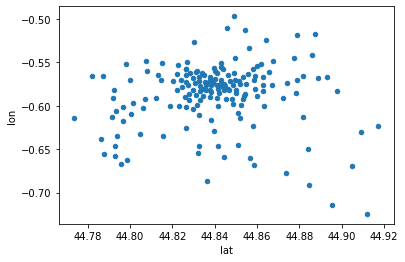

In [70]:
stations.plot(kind='scatter', x='lat', y='lon')

#### Fonction de lecture

In [71]:
def read_stations_attributes(file_path = "../../data/bordeaux-stations.csv"):
    """
    Lecture du fichier sur les attributs des Vcub à Bordeaux
    Modification par rapport au fichier original : 
        - Changement de nom des colonnnes :
            - ident -> station_id
    
    Parameters
    ----------
    file_path : str
        Chemin d'accès au fichiers source
    
    Returns
    -------
    activite : DataFrame
        
    Examples
    --------
    
    stations = read_stations_attributes()
    """
    
    column_dtypes = {'ident': 'uint8',
                     'nom': 'string',
                    }


    stations = pd.read_csv(file_path, dtype = column_dtypes)
    
    stations.rename(columns={'ident':'station_id'}, inplace=True)
    return stations

In [72]:
stations = read_stations_attributes()

In [73]:
stations.tail()

,station_id,nom,lat,lon
169,97,Fontaine d'Arlac,44.826504,-0.625774
170,100,Bruges Hôtel de Ville,44.881449,-0.613374
171,113,Barrière St Genès,44.822094,-0.581782
172,122,Place St Martial,44.858908,-0.565843
173,36,Libération,44.833235,-0.582833


#### Industrialisation

In [113]:
from vcub_keeper.reader.reader import read_activity_vcub

In [114]:
stations = read_stations_attributes()

In [115]:
stations.tail()

,station_id,nom,lat,lon
169,97,Fontaine d'Arlac,44.826504,-0.625774
170,100,Bruges Hôtel de Ville,44.881449,-0.613374
171,113,Barrière St Genès,44.822094,-0.581782
172,122,Place St Martial,44.858908,-0.565843
173,36,Libération,44.833235,-0.582833


### Fichier activité Vcub

In [77]:
file_path = "../../data/bordeaux.csv"
activite = pd.read_csv(file_path, parse_dates=["ts"])

In [78]:
activite.head()

,gid,ident,type,name,state,available_stand,available_bike,ts
0,83,1,VLS,Meriadeck,CONNECTEE,18,2,2017-07-09 00:03:04
1,84,2,VLS,St Bruno,CONNECTEE,7,13,2017-07-09 00:03:04
2,41,3,VLS,Place Tartas,CONNECTEE,17,1,2017-07-09 00:03:04
3,42,4,VLS,St Seurin,CONNECTEE,18,2,2017-07-09 00:03:04
4,43,5,VLS,Place Gambetta,CONNECTEE,37,2,2017-07-09 00:03:04


In [79]:
activite.tail()

,gid,ident,type,name,state,available_stand,available_bike,ts
3761875,173,170,VLS,Lucien Faure,CONNECTEE,8,11,2017-09-26 14:59:04
3761876,171,171,VLS,Pl. Amedee Larrieu,CONNECTEE,20,0,2017-09-26 14:59:04
3761877,174,172,VLS,La Cite du Vin,CONNECTEE,1,19,2017-09-26 14:59:04
3761878,175,173,VLS,Rue Achard,CONNECTEE,12,7,2017-09-26 14:59:04
3761879,176,174,VLS,Darwin,CONNECTEE,0,20,2017-09-26 14:59:04


In [80]:
activite.dtypes

gid                         int64
ident                       int64
type                       object
name                       object
state                      object
available_stand             int64
available_bike              int64
ts                 datetime64[ns]
dtype: object

In [81]:
activite.describe()

,gid,ident,available_stand,available_bike
count,3.761880e+06,3.761880e+06,3.761880e+06,3.761880e+06
mean,8.790230e+01,8.750000e+01,1.118367e+01,8.838549e+00
std,5.078858e+01,5.022865e+01,7.289902e+00,6.720721e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.400000e+01,4.400000e+01,6.000000e+00,4.000000e+00
50%,8.750000e+01,8.750000e+01,1.100000e+01,8.000000e+00
75%,1.310000e+02,1.310000e+02,1.500000e+01,1.300000e+01
max,1.760000e+02,1.740000e+02,4.400000e+01,4.500000e+01


In [82]:
activite.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761880 entries, 0 to 3761879
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   gid              int64         
 1   ident            int64         
 2   type             object        
 3   name             object        
 4   state            object        
 5   available_stand  int64         
 6   available_bike   int64         
 7   ts               datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 852.4 MB


In [83]:
activite.sample(5)

,gid,ident,type,name,state,available_stand,available_bike,ts
2745754,57,35,VLS,Pl. Marie Brizard,DECONNECTEE,1,0,2017-09-06 06:14:03
1659720,123,109,VLS,Barriere St Genes,CONNECTEE,9,27,2017-08-15 14:04:04
1381564,43,5,VLS,Place Gambetta,CONNECTEE,39,1,2017-08-09 20:05:04
718831,60,38,VLS,Pl. Charles Gruet,CONNECTEE,5,11,2017-07-24 06:44:04
2139480,145,151,VLS+,Dravemont,CONNECTEE,11,9,2017-08-25 03:49:03


In [84]:
activite.columns

Index(['gid', 'ident', 'type', 'name', 'state', 'available_stand',
       'available_bike', 'ts'],
      dtype='object')

In [85]:
column_dtypes = {'gid': 'uint8',
                 'ident': 'uint8',
                 'type': 'category',
                 'name': 'string',
                 'state': 'category',
                 'available_stand': 'uint8',
                 'available_bike': 'uint8'}

file_path = "../../data/bordeaux.csv"
activite = pd.read_csv(file_path, parse_dates=["ts"], dtype = column_dtypes)

In [86]:
activite.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761880 entries, 0 to 3761879
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   gid              uint8         
 1   ident            uint8         
 2   type             category      
 3   name             string        
 4   state            category      
 5   available_stand  uint8         
 6   available_bike   uint8         
 7   ts               datetime64[ns]
dtypes: category(2), datetime64[ns](1), string(1), uint8(4)
memory usage: 305.7 MB


#### Fonction de lecture : 

In [116]:
def read_activity_vcub(file_path = "../../data/bordeaux.csv"):
    """
    Lecture du fichier temporelle sur l'activité des Vcub à Bordeaux
    Modification par rapport au fichier original : 
        - Modification des type du DataFrame
        - Mapping de la colonne 'state'
        - Changement de nom des colonnnes :
            - ident -> station_id
            - ts -> date
        - Triage du DataFrame par rapport à la station_id et à la date.
    Parameters
    ----------
    file_path : str
        Chemin d'accès au fichiers source
    
    Returns
    -------
    activite : DataFrame
        
    Examples
    --------
    
    activite = read_activity_vcub()
    """
    
    column_dtypes = {'gid': 'uint8',
                     'ident': 'uint8',
                     'type': 'category',
                     'name': 'string',
                     'state': 'category',
                     'available_stand': 'uint8',
                     'available_bike': 'uint8'}
    
    state_dict = {'CONNECTEE' : 1,
                  'DECONNECTEE' : 0
                 }

    activite = pd.read_csv(file_path, parse_dates=["ts"], dtype = column_dtypes)
    
    activite['state'] = activite['state'].map(state_dict)
    
    # Renaming colomns
    activite.rename(columns={'ident':'station_id'}, inplace=True)
    activite.rename(columns={'ts':'date'}, inplace=True)
    
    # Sorting DataFrame on station_id & date
    activite.sort_values(['station_id', 'date'], ascending=[1, 1], inplace=True)
    
    # Reset index
    activite.reset_index(inplace=True, drop=True)
    
    return activite

In [117]:
activite = read_activity_vcub()

In [110]:
activite.shape

(3761880, 8)

In [111]:
activite.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761880 entries, 0 to 3761879
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   gid              uint8         
 1   station_id       uint8         
 2   type             category      
 3   name             string        
 4   state            category      
 5   available_stand  uint8         
 6   available_bike   uint8         
 7   date             datetime64[ns]
dtypes: category(2), datetime64[ns](1), string(1), uint8(4)
memory usage: 305.7 MB


In [112]:
activite.head()

,gid,station_id,type,name,state,available_stand,available_bike,date
0,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:03:04
1,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:04:04
2,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:09:04
3,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:14:03
4,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:19:04


#### Industrialisation

In [118]:
from vcub_keeper.reader.reader import read_activity_vcub

In [119]:
activite = read_activity_vcub()

In [120]:
activite.head()

,gid,station_id,type,name,state,available_stand,available_bike,date
0,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:03:04
1,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:04:04
2,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:09:04
3,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:14:03
4,83,1,VLS,Meriadeck,1,18,2,2017-07-09 00:19:04


In [121]:
activite.tail()

,gid,station_id,type,name,state,available_stand,available_bike,date
3761875,176,174,VLS,Darwin,1,1,19,2017-09-26 14:39:02
3761876,176,174,VLS,Darwin,1,0,20,2017-09-26 14:44:05
3761877,176,174,VLS,Darwin,1,0,20,2017-09-26 14:49:05
3761878,176,174,VLS,Darwin,1,0,20,2017-09-26 14:54:04
3761879,176,174,VLS,Darwin,1,0,20,2017-09-26 14:59:04


In [122]:
activite['available_bike_shift'] = \
    activite.groupby('station_id')['available_bike'].shift(1)

activite['available_bike_shift'] = activite['available_bike_shift'].fillna(0)

activite['transactions'] = np.abs(activite['available_bike'] - activite['available_bike_shift'])

In [126]:
activite[activite.transactions >= 3]

,gid,station_id,type,name,state,available_stand,available_bike,date,available_bike_shift,transactions
134,83,1,VLS,Meriadeck,1,14,6,2017-07-09 11:09:04,9.0,3.0
189,83,1,VLS,Meriadeck,1,17,3,2017-07-09 15:49:03,0.0,3.0
391,83,1,VLS,Meriadeck,1,0,20,2017-07-10 08:44:04,17.0,3.0
416,83,1,VLS,Meriadeck,1,0,20,2017-07-10 10:49:20,17.0,3.0
421,83,1,VLS,Meriadeck,1,3,17,2017-07-10 11:13:23,20.0,3.0
...,...,...,...,...,...,...,...,...,...,...
3761584,176,174,VLS,Darwin,1,1,19,2017-09-25 14:09:03,16.0,3.0
3761612,176,174,VLS,Darwin,1,3,17,2017-09-25 16:29:04,13.0,4.0
3761620,176,174,VLS,Darwin,1,6,14,2017-09-25 17:09:04,17.0,3.0
3761638,176,174,VLS,Darwin,1,13,7,2017-09-25 18:39:04,0.0,7.0


In [127]:
activite[activite.index >= 3761638 - 5].head(10)

,gid,station_id,type,name,state,available_stand,available_bike,date,available_bike_shift,transactions
3761633,176,174,VLS,Darwin,1,20,0,2017-09-25 18:14:04,0.0,0.0
3761634,176,174,VLS,Darwin,1,20,0,2017-09-25 18:19:02,0.0,0.0
3761635,176,174,VLS,Darwin,1,20,0,2017-09-25 18:24:04,0.0,0.0
3761636,176,174,VLS,Darwin,1,20,0,2017-09-25 18:29:05,0.0,0.0
3761637,176,174,VLS,Darwin,1,20,0,2017-09-25 18:34:04,0.0,0.0
3761638,176,174,VLS,Darwin,1,13,7,2017-09-25 18:39:04,0.0,7.0
3761639,176,174,VLS,Darwin,1,12,8,2017-09-25 18:44:04,7.0,1.0
3761640,176,174,VLS,Darwin,1,12,8,2017-09-25 18:49:03,8.0,0.0
3761641,176,174,VLS,Darwin,1,12,8,2017-09-25 18:54:05,8.0,0.0
3761642,176,174,VLS,Darwin,1,12,8,2017-09-25 18:59:03,8.0,0.0
